In [1]:
import sys
sys.path.append('..')

%reload_ext autoreload
%autoreload 2
# %aimport sponge_networks
# %aimport sponge_networks.utils

In [20]:
import sponge_networks as rn

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 12
%matplotlib inline

import numpy as np
import networkx as nx
import scipy
import cairosvg
import imageio
import pandas as pd
from IPython.lib import pretty
from toolz import *
# import abc

# import plotly.graph_objs as go
# import plotly.express as px

from scipy.linalg import null_space

In [3]:
from collections.abc import Sequence

In [4]:
%%html
<style>
/* Any CSS style can go in here. */
.dataframe th {
    font-size: 14px;
}
.dataframe td {
    font-size: 14px;
}
</style>


## Layouts

In [150]:
it = nx.triangular_lattice_graph(1, 2, with_positions=True, create_using=nx.Graph)
nx.to_dict_of_dicts(it)

{(0, 0): {(1, 0): {}, (0, 1): {}},
 (1, 0): {(0, 0): {}, (1, 1): {}, (0, 1): {}},
 (0, 1): {(1, 1): {}, (0, 0): {}, (1, 0): {}},
 (1, 1): {(0, 1): {}, (1, 0): {}}}

In [153]:
# nx.draw(it.to_directed())

In [139]:
gr.nodes[(4, 7)]

{'pos': (6.0, 6.06217782649107)}

In [135]:
gr.nodes[(5, 6)]

{'pos': (7.5, 5.196152422706632)}

In [144]:
gr.nodes[(0, 7)]

{'pos': (0.0, 6.06217782649107)}

In [146]:
gr.nodes[(6, 11)]["fddf"] = 3
gr.nodes[(6, 11)]

{'pos': (9.0, 9.526279441628825), 'fddf': 3}

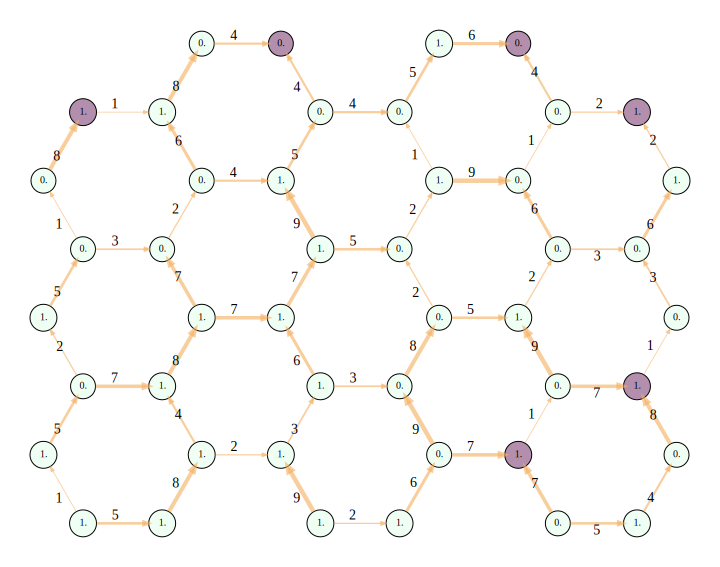

In [154]:
# gr = nx.triangular_lattice_graph(3, 5, with_positions=True, create_using=nx.DiGraph)
gr = nx.hexagonal_lattice_graph(3, 5, with_positions=True, create_using=nx.DiGraph)
# gr = nx.grid_2d_graph(3, 5, create_using=nx.DiGraph)
# gr.add_edge(0, 1, weight=12)
# nx.to_dict_of_dicts(gr)
# nx.draw_networkx(gr)
# nx.nx_agraph.write_dot(gr.to_undirected(), 'temp')
nw = rn.ResourceNetworkGreedy(gr)
len(gr)

sim = nw.run_simulation(np.random.randint(0, 2, size=len(nw)), n_iters=10)
# rn.plot_simulation(nw, sim, scale=0.8)
svgs = nw.plot_with_states(sim, scale=1.1)
svgs[0]

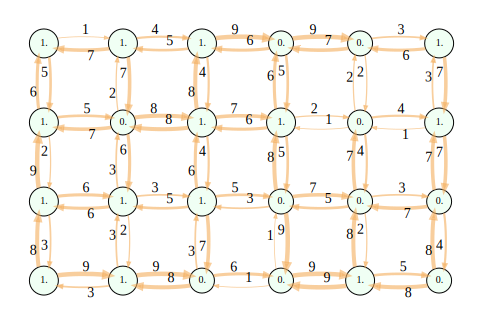

In [159]:
gr = rn.grid_with_positions(5, 3, grid_type="grid_2d")
nw = rn.ResourceNetworkGreedy(gr)
len(gr)

sim = nw.run_simulation(np.random.randint(0, 2, size=len(nw)), n_iters=10)
# rn.plot_simulation(nw, sim, scale=0.8)
svgs = nw.plot_with_states(sim, scale=1.1)
svgs[0]

In [173]:
it.nodes[(0, 1)]

{'pos': (0.5, 0.8660254037844386)}

## Examples

In [4]:
# n = 4
# G2 = ResourceNetwork(nx.fast_gnp_random_graph(n, 0.4, directed=True))
# sim = G2.run_simulation(np.random.randint(10, 13, size=n), 40)
# plot_simulation(G2, sim)
# sim.arr

In [17]:
ig = np.array([
       [0, 0, 2, 0], #если заменить 2 на 1, то аттрактором станет другая вершина!
       [0, 0, 0, 4], 
       [3, 2, 0, 0],
       [1, 5, 0, 0]])
interesting_graph = rn.ResourceNetwork(nx.from_numpy_array(
    ig,
    create_using=nx.DiGraph))
sim = interesting_graph.run_simulation([20, 10, 6, 12], 20)
rn.plot_simulation(interesting_graph, sim, scale=1)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=19), Output()), _dom_classes=('widg…

In [133]:
ig = np.array([
       [1, 0, 2, 0], #если заменить 2 на 1, то аттрактором станет другая вершина!
       [0, 0, 0, 4], 
       [3, 2, 5, 0],
       [1, 5, 0, 0]
])
Gr = nx.from_numpy_array(
    np.diag(np.arange(2)),
    create_using=nx.DiGraph
)
interesting_graph = rn.ResourceNetworkGreedy(Gr)
# sim = interesting_graph.run_simulation([20, 10, 0, 12], 300)
# rn.plot_simulation(interesting_graph, sim)

In [135]:
G = interesting_graph
print(G)
G = G.altered(lambda x: x.add_edge(0, "lala", weight=10))
G

ResourceNetworkGreedy(adjacency_matrix=array([[0, 0],
                                              [0, 1]]),
                      idx_descriptor=[0, 1])


ResourceNetworkGreedy(adjacency_matrix=array([[ 0,  0, 10],
                                              [ 0,  1,  0],
                                              [ 0,  0,  0]]),
                      idx_descriptor=[0, 1, 'lala'])

In [24]:
# it = sim.simple_protocol()
# it.to_excel("../tests/data/g1.xlsx")

In [25]:
M = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [3, 1, 1, 1, 1],
    [4, 1, 1, 1, 1],
    [5, 1, 1, 1, 1]
])
G = ResourceNetwork(nx.from_numpy_array(M, create_using=nx.DiGraph))
sim = G.run_simulation([0, 40, 0, 0, 0], 40)
plot_simulation(G, sim, scale=1.5)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=39), Output()), _dom_classes=('widg…

In [28]:
G_gr = G.to_child(ResourceNetworkGreedy)
sim = G_gr.run_simulation([0, 40, 0, 0, 0], 40)
plot_simulation(G_gr, sim, scale=1.5)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=39), Output()), _dom_classes=('widg…

## Simple network

In [13]:
G_ = ResourceDiGraph(nx.from_numpy_array(np.array([
    [0, 1, 0],
    [0, 0, 2],
    [3, 0, 0]
]), create_using=nx.DiGraph))
# with open('work/ipu/report 01.02.22/3.svg', 'w') as f:
    # f.write(G_.plot().data)

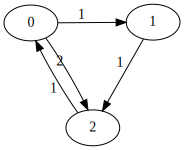

In [14]:
G = ResourceDiGraph(nx.from_numpy_array(np.array([
    [0, 1, 2],
    [0, 0, 1],
    [1, 0, 0]
]), create_using=nx.DiGraph))
G.plot()

In [15]:
G = ResourceDiGraphWithIncome(nx.from_numpy_array(np.array([
    [0, 4, 5],
    [0, 0, 4],
    [3, 0, 0]
]), create_using=nx.DiGraph))
sim = G.run_simulation([0, 20, 0], 26)
plot_simulation(G, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=25), Output()), _dom_classes=('widg…

In [16]:
G2 = ResourceDiGraphWithIncome(nx.from_numpy_array(np.array([
    [0, 4, 5],
    [0, 0, 6],
    [10, 0, 0]
]), create_using=nx.DiGraph))
sim = G2.run_simulation([0, 30, 0], 50)
plot_simulation(G2, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=49), Output()), _dom_classes=('widg…

In [17]:
G2.T()

22.0

In [18]:
G2.r_out() / G2.one_limit_state()

array([22.        , 33.        , 24.44444444])

In [19]:
G2.r_out(), G2.one_limit_state()

(array([ 9,  6, 10]), array([0.40909091, 0.18181818, 0.40909091]))

In [42]:
import io

In [43]:
f = io.StringIO('test')

In [44]:
plotted = G.plot_with_states(sim)[0]

In [ ]:
# writer.append_data()

In [23]:
svg_array = G.plot_with_states(sim)

In [32]:
svg = svg_array[0]


In [88]:
path = '/home/heinwol/Documents/WinDocs/work/9_sem/nir_resource1/presentation_test/data/'
arr = []
# writer = imageio.get_writer(path + 'test2.mp4', format='FFMPEG', mode='I', fps=1)
for i, it in enumerate(G.plot_with_states(sim)):
    cairosvg.svg2png(bytestring=it.data, write_to= path + 'temp.png', dpi=200)
    arr.append(imageio.imread(path + 'temp.png'))
#     writer.append_data(imageio.imread(path + 'temp.png'))
imageio.mimsave(path + 'second.gif', arr, fps=1)
# writer.close()
# cairosvg.svg2png(bytestring=it.data, write_to= path + f'first-{i}.png')

In [41]:
with open('/home/heinwol/Documents/WinDocs/work/9_sem/nir_resource1/data/example1-4.svg', 'w') as f:
    f.write(G.plot_with_states(sim)[-1].data)

In [42]:
print(simple_protocol(sim).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
t  &           &           &           \\
\midrule
0  &  0.000000 &  0.000000 &  0.000000 \\
1  &  0.500000 &  0.500000 &  0.500000 \\
2  &  0.750000 &  0.472222 &  1.027778 \\
3  &  1.152778 &  0.458333 &  1.013889 \\
4  &  1.076389 &  0.574846 &  1.161265 \\
5  &  1.192515 &  0.509645 &  1.204090 \\
6  &  1.219715 &  0.545632 &  1.187779 \\
7  &  1.195591 &  0.549908 &  1.231064 \\
8  &  1.234970 &  0.535280 &  1.218031 \\
9  &  1.219985 &  0.550829 &  1.223328 \\
10 &  1.224304 &  0.543192 &  1.229574 \\
11 &  1.230063 &  0.544623 &  1.223849 \\
12 &  1.224093 &  0.546939 &  1.228236 \\
13 &  1.228358 &  0.544164 &  1.227113 \\
14 &  1.227174 &  0.545998 &  1.226646 \\
15 &  1.226676 &  0.545441 &  1.227791 \\
16 &  1.227807 &  0.545205 &  1.226943 \\
17 &  1.226951 &  0.545699 &  1.227327 \\
18 &  1.227331 &  0.545315 &  1.227343 \\
19 &  1.227344 &  0.545482 &  1.227168 \\
20 &  1.227169 &  0.545487 &  1.2273

In [13]:
null_space((G.stochastic_matrix() - np.eye(3)).T)

array([[-0.6882472 ],
       [-0.22941573],
       [-0.6882472 ]])

In [14]:
sim = G.run_simulation([1, 0, 0], 40)
plot_simulation(G, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=39), Output()), _dom_classes=('widg…

In [15]:
prot = simple_protocol(sim)
# prot.diff().abs().sum(axis=1).diff()
prot

,0,1,2
t,,,
0,1.000000,0.000000,0.000000
1,0.000000,0.333333,0.666667
2,0.666667,0.000000,0.333333
3,0.333333,0.222222,0.444444
4,0.444444,0.111111,0.444444
5,0.444444,0.148148,0.407407
6,0.407407,0.148148,0.444444
7,0.444444,0.135802,0.419753
8,0.419753,0.148148,0.432099


---

---